<a href="https://colab.research.google.com/github/Arainal0112/PCVK_Ganjil_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 7 – Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection

- Nama : Arainal Aldiansyah
- Kelas : TI - 3C
- Absen : 03
- NIM : 2141720042

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Library

In [5]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import math

from google.colab.patches import cv2_imshow
from PIL import Image as im

Fungsi Konvolusi

In [12]:
def convolution(image, kernel, padding, stride):
    # Get image dimensions
    image_height, image_width = image.shape
    # Get kernel dimensions
    filter_height, filter_width = kernel.shape
    # Calculate the output dimensions after convolution with padding and stride
    output_height = ((image_height + 2 * padding - filter_height) // stride) + 1
    output_width = ((image_width + 2 * padding - filter_width) // stride) + 1

    # Initialize the output image
    output_image = np.zeros((output_height, output_width))

    # Iterate over each pixel in the output image
    for y in range(output_height):
        for x in range(output_width):
            # Apply the convolution formula
            z = 0
            for k1 in range(filter_width):
                for k2 in range(filter_height):
                    # Calculate the corresponding pixel in the image
                    img_pixel_x = x * stride + k1 - padding
                    img_pixel_y = y * stride + k2 - padding
                    # Check for out-of-bounds indices and handle padding
                    if img_pixel_x >= 0 and img_pixel_x < image_width and img_pixel_y >= 0 and img_pixel_y < image_height:
                        z += kernel[k2, k1] * image[img_pixel_y, img_pixel_x]
            # Assign the result to the output image
            output_image[y, x] = z

    return output_image

Load Citra

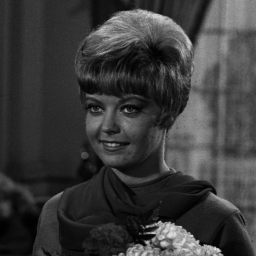

In [13]:
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

## Menentukan Kernel yang digunakan

### Sharpening

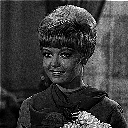

In [21]:
# Sharpening / Penajaman
kernel_sharpen = np.array( [[0,-1,0],
                            [-1,5,-1],
                            [0,-1,0]])
output_image = convolution(img_gray, kernel_sharpen, 1, 2)
cv2_imshow(output_image)

### Emboss

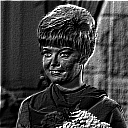

In [23]:
# Emboss
kernel_emboss = np.array( [[-2,-1,0],
                            [-1,1,1],
                            [0,1,2]])
output_image = convolution(img_gray, kernel_emboss, 1, 2)
cv2_imshow(output_image)

### Left Sobel Edge Detection

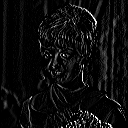

In [26]:
# Left Sobel Edge Detection
kernel_lsed = np.array( [[1,0,-1],
                            [2,0,-2],
                            [1,0,-1]])
output_image = convolution(img_gray, kernel_lsed, 1, 2)
cv2_imshow(output_image)

### Canny Edge Detection

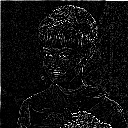

In [28]:
# Canny Edge Detection
kernel_canny = np.array( [[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])
output_image = convolution(img_gray, kernel_canny, 1, 2)
cv2_imshow(output_image)

### Prewitt Edge Detection

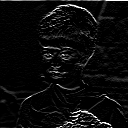

In [30]:
# Prewitt Edge Detection
kernel_prewitt = np.array( [[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])
output_image = convolution(img_gray, kernel_prewitt, 1, 2)
cv2_imshow(output_image)

### 5x5 Gaussian Blur

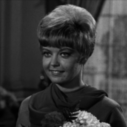

In [31]:
# Gaussian Blur
kernel_gaussian_blur = np.array([[1, 4, 6, 4, 1],
                                [4, 16, 24, 16, 4],
                                [6, 24, 36, 24, 6],
                                [4, 16, 24, 16, 4],
                                [1, 4, 6, 4, 1]]) / 256

output_image = convolution(img_gray, kernel_gaussian_blur, 1, 2)
cv2_imshow(output_image)

### 21x21 Gaussian Blur

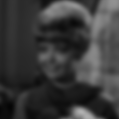

In [32]:
# 21x21 Gaussian Blur

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel_21 = gaussian_kernel @ gaussian_kernel.transpose()

output_image = convolution(img_gray, gauss_kernel_21, 1, 2)
cv2_imshow(output_image)

# **TUGAS**
Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.